# Simple MNIST NN from scratch

In this notebook, I implemented a simple two-layer neural network and trained it on the MNIST digit recognizer dataset. It's meant to be an instructional example, through which you can understand the underlying math of neural networks better.

Here's a video I made explaining all the math and showing my progress as I coded the network: https://youtu.be/w8yWXqWQYmU

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [3]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [4]:
Y_train

array([0, 5, 6, ..., 1, 3, 5])

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[1 5 1 ... 5 5 0] [0 5 6 ... 1 3 5]
0.07765853658536585
Iteration:  10
[3 0 8 ... 3 2 0] [0 5 6 ... 1 3 5]
0.142390243902439
Iteration:  20
[1 0 8 ... 1 2 0] [0 5 6 ... 1 3 5]
0.2530487804878049
Iteration:  30
[1 0 4 ... 1 3 0] [0 5 6 ... 1 3 5]
0.3430975609756098
Iteration:  40
[0 0 4 ... 1 3 0] [0 5 6 ... 1 3 5]
0.4197560975609756
Iteration:  50
[0 0 6 ... 1 2 0] [0 5 6 ... 1 3 5]
0.48734146341463414
Iteration:  60
[0 0 6 ... 1 2 0] [0 5 6 ... 1 3 5]
0.5387560975609756
Iteration:  70
[0 0 6 ... 1 3 0] [0 5 6 ... 1 3 5]
0.5786829268292683
Iteration:  80
[0 0 6 ... 1 3 0] [0 5 6 ... 1 3 5]
0.6098292682926829
Iteration:  90
[0 0 6 ... 1 3 0] [0 5 6 ... 1 3 5]
0.6344390243902439
Iteration:  100
[0 0 6 ... 1 3 0] [0 5 6 ... 1 3 5]
0.6558536585365854
Iteration:  110
[0 0 6 ... 1 3 0] [0 5 6 ... 1 3 5]
0.6730731707317074
Iteration:  120
[0 0 6 ... 1 3 0] [0 5 6 ... 1 3 5]
0.6880731707317073
Iteration:  130
[0 0 6 ... 1 3 0] [0 5 6 ... 1 3 5]
0.7011219512195122
Iteration:  140


In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


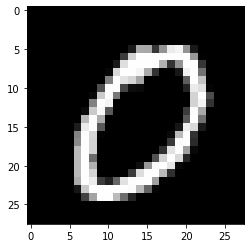

Prediction:  [0]
Label:  5


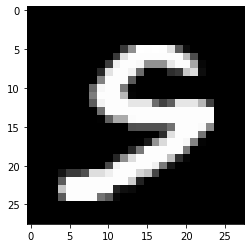

Prediction:  [6]
Label:  6


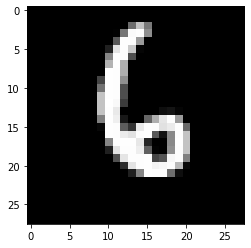

Prediction:  [4]
Label:  4


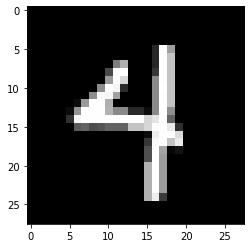

In [8]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [9]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 7 5 0 9 1 9 4 2 2 7 5 0 9 9 4 9 1 7 7 6 4 7 6 1 0 4 9 6 7 2 9 0 7 9 1 6
 1 4 1 8 1 5 1 5 8 4 7 1 4 9 9 1 4 8 8 3 8 1 3 7 9 2 4 3 2 9 2 6 3 4 3 7 9
 4 0 6 7 6 0 6 7 9 0 3 8 1 3 3 1 4 4 8 3 9 9 1 5 2 6 9 3 0 6 2 9 8 5 8 0 1
 3 4 9 0 9 6 9 7 3 3 0 2 8 6 0 6 3 8 2 5 0 3 1 9 5 7 6 7 8 5 2 5 6 8 2 8 9
 9 1 1 1 0 5 4 0 5 3 4 0 6 6 6 8 4 3 8 0 1 7 3 8 1 2 9 0 8 9 2 0 4 8 0 4 6
 5 0 4 2 8 6 3 2 0 4 5 3 5 7 7 8 4 9 2 8 1 4 9 5 5 0 5 2 6 0 6 3 0 1 5 9 1
 8 0 4 2 8 1 4 0 0 0 3 5 8 3 4 1 7 5 8 1 6 1 5 9 4 4 1 1 3 1 0 2 8 4 9 1 0
 0 6 3 6 8 7 3 6 8 5 1 0 2 3 9 2 3 5 4 5 9 9 6 7 0 9 9 0 7 5 6 0 5 1 1 9 1
 4 8 3 4 6 8 6 7 6 7 5 4 1 4 6 1 9 9 5 1 8 5 2 4 8 8 4 3 8 0 4 1 1 0 3 3 1
 2 3 9 3 0 8 5 4 2 1 5 8 0 3 7 2 6 8 8 6 2 8 2 2 9 6 5 6 1 3 3 3 3 5 1 6 7
 1 6 3 8 7 7 4 9 2 0 3 1 5 0 2 8 4 2 0 2 4 2 4 7 6 9 9 4 2 1 8 7 8 2 9 7 9
 4 1 3 5 3 6 0 3 1 9 6 8 9 3 9 9 7 9 0 0 0 1 2 2 0 1 4 9 6 4 3 5 1 4 8 2 5
 5 5 4 6 7 9 7 6 1 2 4 0 6 2 1 1 3 2 5 4 8 3 4 8 3 1 9 6 9 9 6 3 6 4 2 0 8
 6 3 8 9 5 7 2 3 3 6 4 0 

0.863